IMPORTING LIBRARIES

In [87]:
try:
    import tensorflow as tf
    import sklearn as sk
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import StandardScaler
    from tensorflow.keras.layers import Dense,Input,Normalization
    import numpy as np
    from sklearn.metrics import confusion_matrix
    import sklearn
    from sklearn.model_selection import ShuffleSplit

except Exception as e:
    print(e)


DATA PREPARATION

In [9]:
try:
    data=pd.read_csv("D:/INeuron/WQP/notebook/data/raw_data.csv")
except Exception as e:
    print(e)
    

In [10]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [18]:
columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']

In [23]:
for _ in columns:
    try:
        print(_)
        print('Unique Values')
        print(data[_].value_counts())
        print('Value Counts')
        print(pd.value_counts(data[_]))
        print('\n')
    except Exception as e:
        print(e)


type
Unique Values
type
white    4898
red      1599
Name: count, dtype: int64
Value Counts
type
white    4898
red      1599
Name: count, dtype: int64


fixed acidity
Unique Values
fixed acidity
6.80     354
6.60     326
6.40     305
7.00     282
6.90     279
        ... 
3.90       1
3.80       1
6.45       1
4.50       1
12.10      1
Name: count, Length: 106, dtype: int64
Value Counts
fixed acidity
6.80     354
6.60     326
6.40     305
7.00     282
6.90     279
        ... 
3.90       1
3.80       1
6.45       1
4.50       1
12.10      1
Name: count, Length: 106, dtype: int64


volatile acidity
Unique Values
volatile acidity
0.280    286
0.240    265
0.260    255
0.250    238
0.220    235
        ... 
0.975      1
1.070      1
0.950      1
1.090      1
0.905      1
Name: count, Length: 187, dtype: int64
Value Counts
volatile acidity
0.280    286
0.240    265
0.260    255
0.250    238
0.220    235
        ... 
0.975      1
1.070      1
0.950      1
1.090      1
0.905      1
Name: coun

C:\Users\Svbeh\AppData\Local\Temp\ipykernel_2860\1045121413.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(data[_]))
C:\Users\Svbeh\AppData\Local\Temp\ipykernel_2860\1045121413.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(data[_]))


In [29]:
type=data['type']

AttributeError: 'Series' object has no attribute 'get_dummies'

In [30]:
type=pd.get_dummies(type)

In [31]:
type

,red,white
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
6492,True,False
6493,True,False
6494,True,False
6495,True,False


In [35]:
type=type.drop('red',axis=1)

In [37]:
type=type.replace({True:1,False:0})

In [38]:
data['type']=type

In [39]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

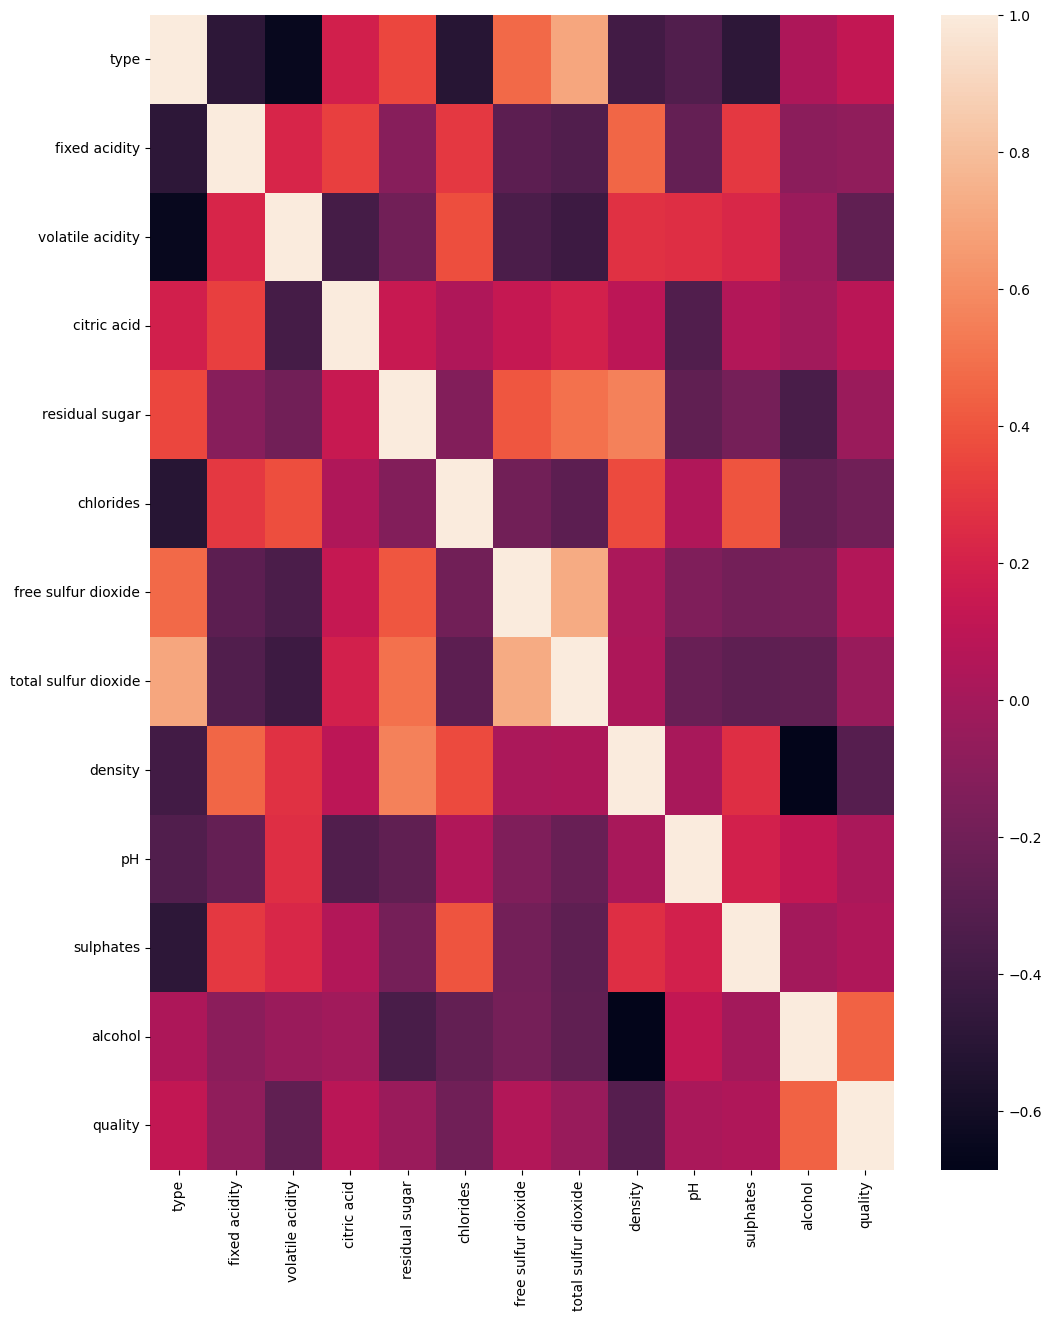

In [41]:
plt.figure(figsize=(12,15))
data_corelation=data.corr()
sns.heatmap(data_corelation)


d:\INeuron\WQP\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\INeuron\WQP\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\INeuron\WQP\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\INeuron\WQP\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vecto

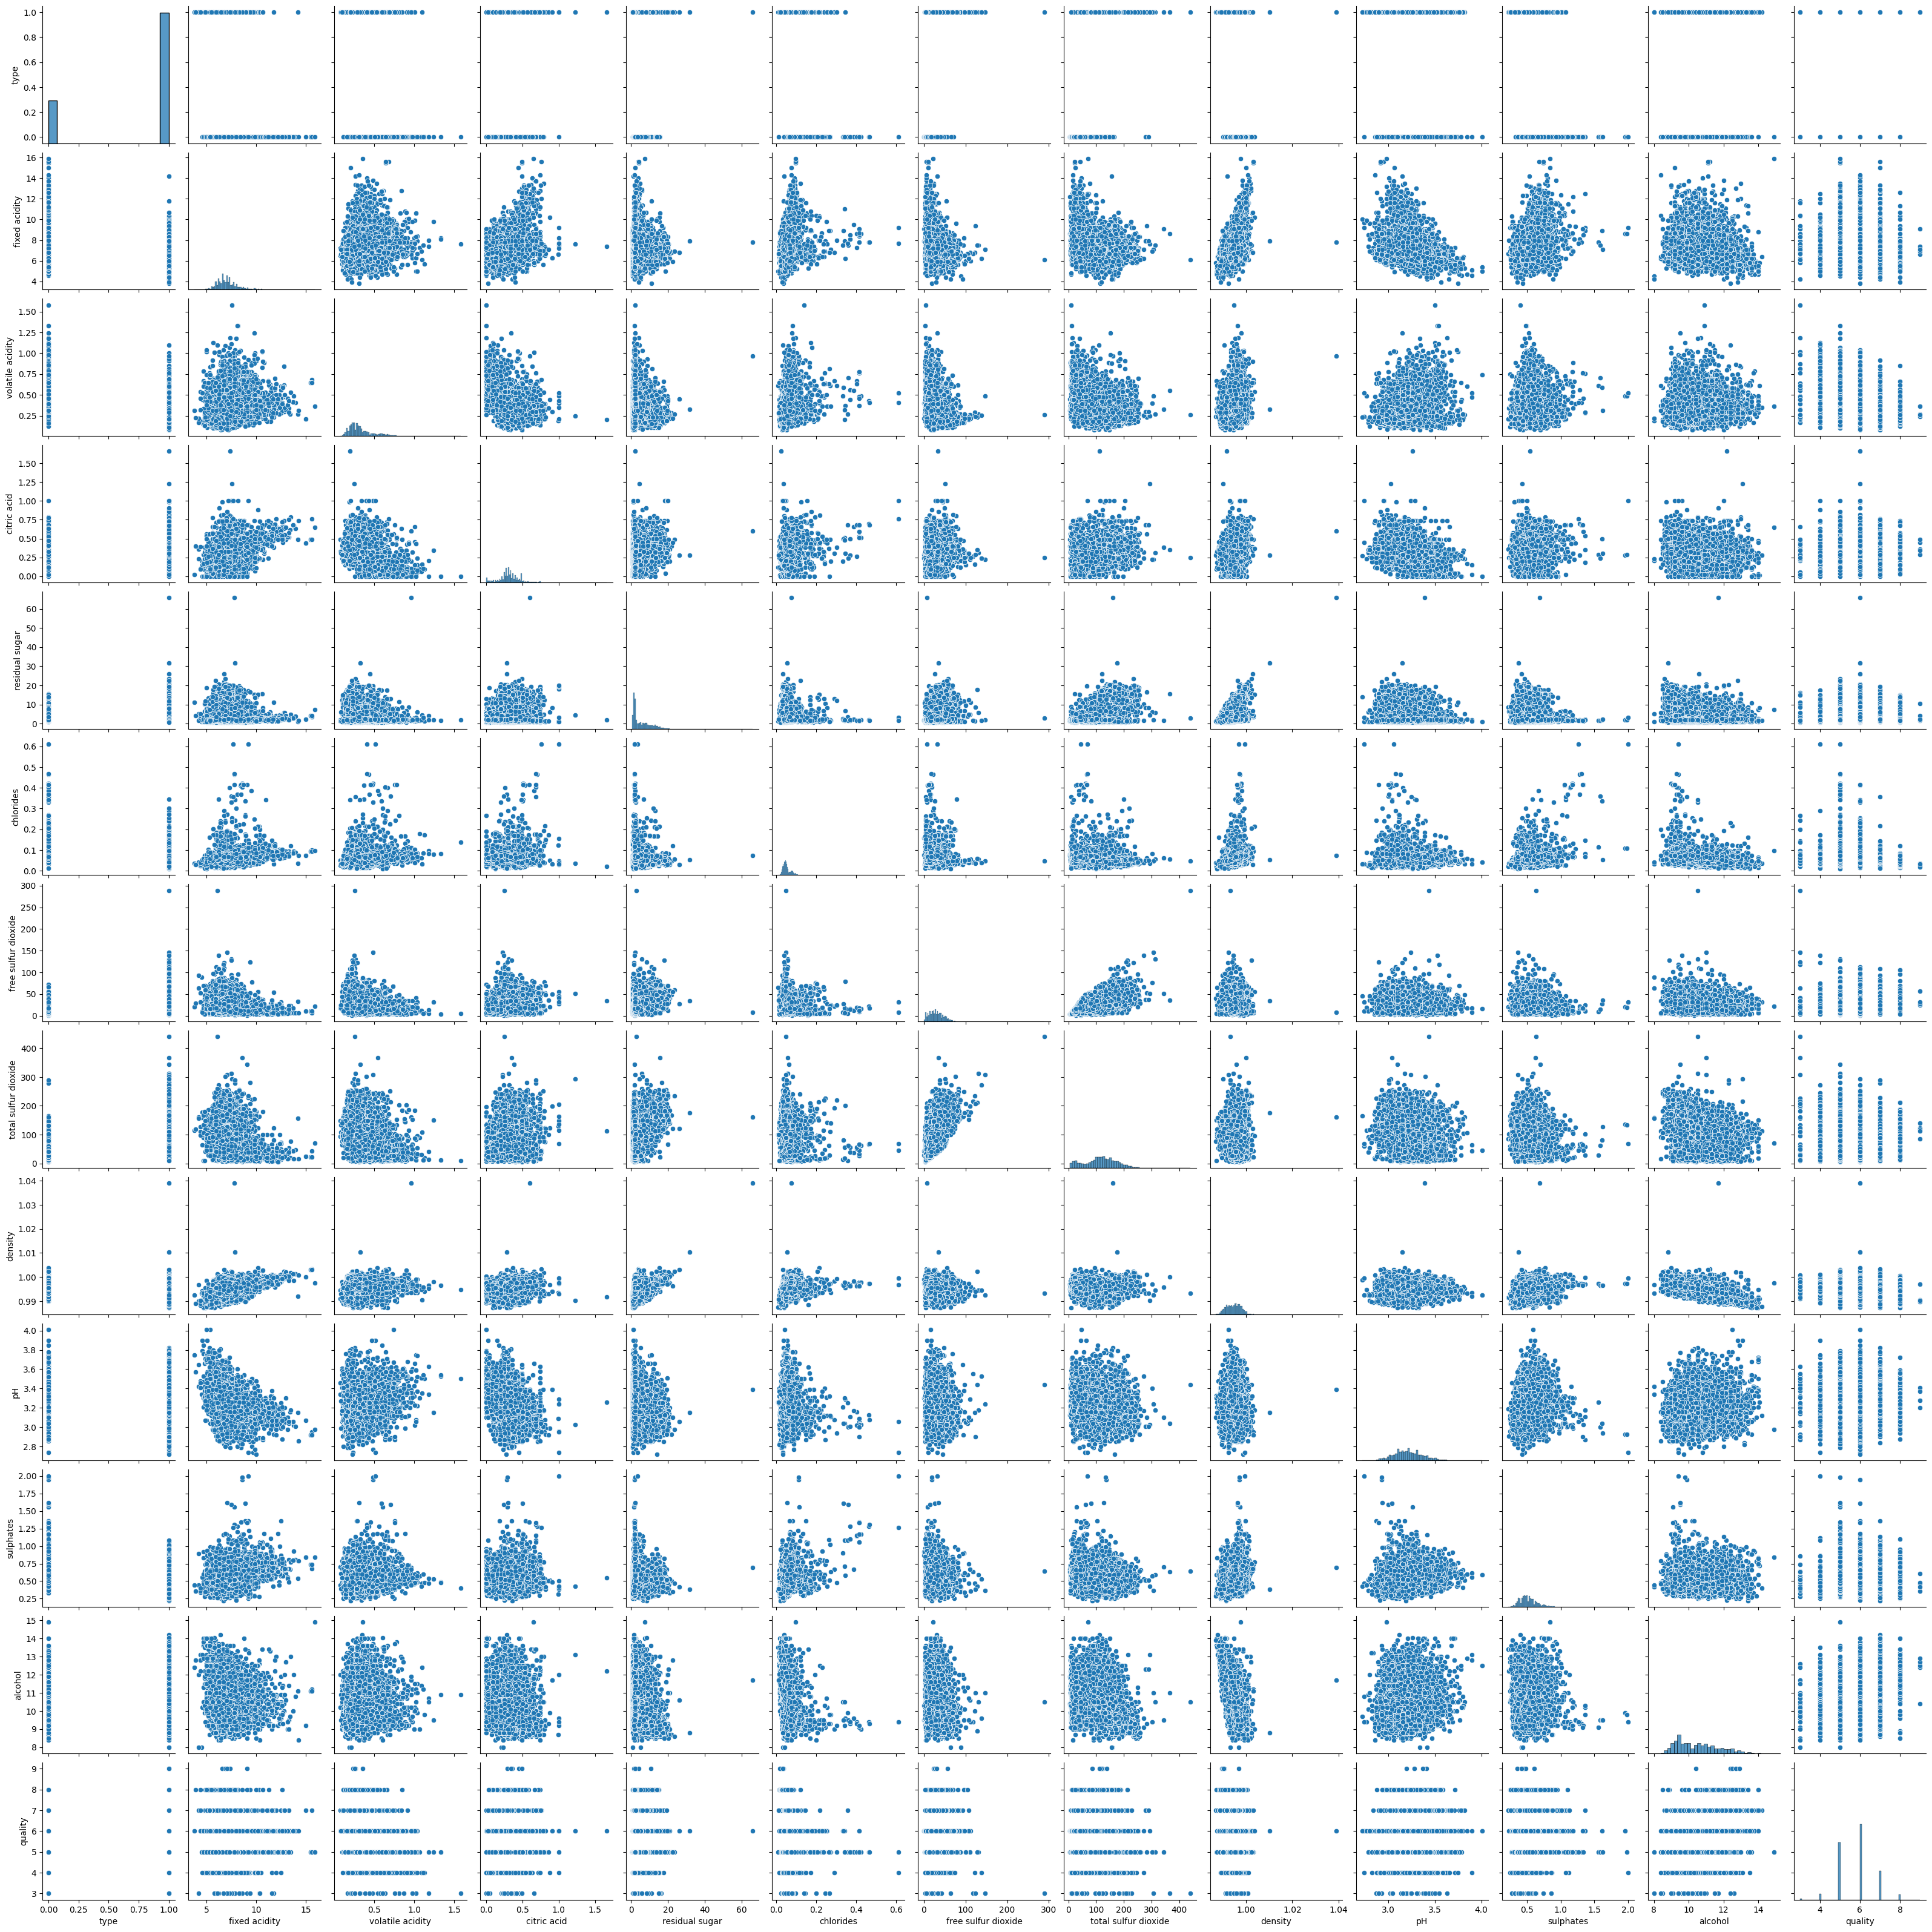

In [43]:
sns.pairplot(data)
plt.show()

DATA PREPROCESSING

In [44]:
data.fillna(data.mean(),inplace=True)
data.dropna(inplace=True)


In [46]:
y_type=data['type']
y_quality=data['quality']


In [48]:
x=data
x.drop(['type','quality'],inplace=True,axis=1)

TRAIN TEST SPLIT

In [53]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10
0,-0.167159,-0.423564,0.284245,3.206977,-0.315222,0.815565,0.959976,2.102214,-1.359665,-0.545959,-1.418558
1,-0.707427,-0.241232,0.146523,-0.808136,-0.201027,-0.931107,0.287618,-0.232332,0.508045,-0.277064,-0.831615
2,0.681835,-0.362786,0.559689,0.306005,-0.172479,-0.029599,-0.331660,0.134525,0.259017,-0.613183,-0.328521
3,-0.012796,-0.666673,0.008801,0.642350,0.055911,0.928254,1.243074,0.301278,-0.176782,-0.882078,-0.496219
4,-0.012796,-0.666673,0.008801,0.642350,0.055911,0.928254,1.243074,0.301278,-0.176782,-0.882078,-0.496219
...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.784609,1.582089,-1.643863,-0.724050,0.969467,0.083090,-1.269422,0.067824,1.441900,0.327950,0.006875
6493,-1.016152,1.278203,-1.506141,-0.682007,0.170105,0.477500,-1.145567,0.141195,1.877699,0.000000,0.593818
6494,-0.707427,1.035093,-1.299558,-0.660986,0.569786,-0.085943,-1.340197,0.347969,1.255129,1.470755,0.426120
6495,-1.016152,1.855587,-1.368419,-0.724050,0.541237,0.083090,-1.269422,0.257923,2.188984,1.201860,-0.244672


In [86]:
data1,data2=ShuffleSplit(data)
x_train=data[:5000]
x_test=data[5000:]
y_type_train=y_type[:5000]
y_quality_train=y_quality[:5000]
y_type_test=y_type[5000:]
y_quality_test=y_quality[5000:]

y_train={"type_wine":y_type_train,"quality_wine":y_quality_train}
y_test={"type_wine":y_type_test,"quality_wine":y_quality_test}


AttributeError: module 'sklearn' has no attribute 'model_selection'

In [83]:
y_train=pd.DataFrame([y_quality_train,y_type_train])
y_train

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
quality,6,6,6,6,6,6,6,6,6,6,...,5,5,4,6,5,5,5,6,6,6
type,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


ML Algorithm

In [59]:
input_layer=Input(shape=(11,))
Dense1=Dense(units=128,activation='relu')(input_layer)
Dense2=Dense(units=256,activation='relu')(Dense1)
Dense3=Dense(units=512,activation='relu')(Dense2)
Dense4=Dense(units=256,activation='relu')(Dense3)
Output1=Dense(units=1,activation='sigmoid',name='type_wine')(Dense4)
Output2=Dense(units=1,activation='relu',name='quality_wine')(Dense4)

In [60]:
ml=tf.keras.Model(inputs=input_layer,outputs=[Output1,Output2])

In [62]:
tf.keras.utils.plot_model(ml, show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [63]:
ml.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 11)]                 0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 128)                  1536      ['input_3[0][0]']             
                                                                                                  
 dense_8 (Dense)             (None, 256)                  33024     ['dense_7[0][0]']             
                                                                                                  
 dense_9 (Dense)             (None, 512)                  131584    ['dense_8[0][0]']             
                                                                                            

In [75]:
ml.compile(optimizer='adam',loss={"type_wine":"binary_crossentropy","quality_wine":"mean_squared_error"}, metrics = {'type_wine' : 'accuracy',
                         'quality_wine': tf.keras.metrics.RootMeanSquaredError()
                       })

ml.fit(x=x_train,y=y_train,epochs=100,shuffle=True,validation_split=0.2)

Epoch 1/100
125/125 [==============================] - 2s 7ms/step - loss: 39.4971 - type_wine_loss: 0.0504 - quality_wine_loss: 39.4467 - type_wine_accuracy: 0.9822 - quality_wine_root_mean_squared_error: 6.2807 - val_loss: 36.4762 - val_type_wine_loss: 2.1362 - val_quality_wine_loss: 34.3400 - val_type_wine_accuracy: 0.8980 - val_quality_wine_root_mean_squared_error: 5.8600
Epoch 2/100
125/125 [==============================] - 1s 5ms/step - loss: 35.3993 - type_wine_loss: 1.6397e-07 - quality_wine_loss: 35.3993 - type_wine_accuracy: 1.0000 - quality_wine_root_mean_squared_error: 5.9497 - val_loss: 36.8811 - val_type_wine_loss: 2.5411 - val_quality_wine_loss: 34.3400 - val_type_wine_accuracy: 0.8980 - val_quality_wine_root_mean_squared_error: 5.8600
Epoch 3/100
125/125 [==============================] - 1s 7ms/step - loss: 35.3993 - type_wine_loss: 3.4578e-08 - quality_wine_loss: 35.3993 - type_wine_accuracy: 1.0000 - quality_wine_root_mean_squared_error: 5.9497 - val_loss: 37.0597 -

In [80]:
ml.predict(x_test)[1]

47/47 [==============================] - 0s 3ms/step


array([0.], dtype=float32)